In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

epl_1617 = pd.read_csv(r"results.csv", encoding= 'unicode_escape')
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl_1617.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR
0,Arsenal,Coventry,0,3,A
1,Aston Villa,QPR,4,1,H
2,Chelsea,Blackburn,1,2,A
3,Liverpool,Sheffield Weds,2,0,H
4,Man City,Leeds,1,1,D


In [45]:
epl_1617 = epl_1617[:-10]
epl_1617.mean()

C:\Users\Omen\AppData\Local\Temp/ipykernel_7032/1206896792.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  epl_1617.mean()


HomeGoals    1.519146
AwayGoals    1.136690
dtype: float64

C:\Users\Omen\AppData\Local\Temp/ipykernel_7032/3638304551.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  poisson_pred = np.column_stack([[poisson.pmf(i, epl_1617.mean()[j]) for i in range(8)] for j in range(2)])


AttributeError: 'Rectangle' object has no property 'normed'

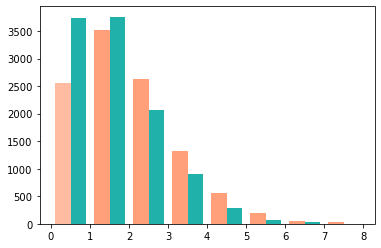

In [46]:
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, epl_1617.mean()[j]) for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(epl_1617[['HomeGoals', 'AwayGoals']].values, range(9), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [ ]:
# probability of home team winning by one goal
skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])

C:\Users\Omen\AppData\Local\Temp/ipykernel_7032/58550314.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam.pmf(1,  epl_1617.mean()[0],  epl_1617.mean()[1])


0.22951324499432052

C:\Users\Omen\AppData\Local\Temp/ipykernel_7032/3123452338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam_pred = [skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in range(-6,8)]


AttributeError: 'Rectangle' object has no property 'normed'

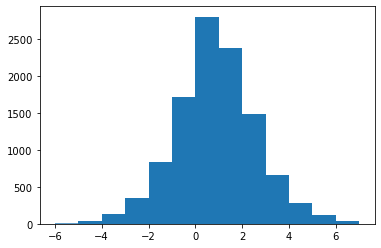

In [ ]:
skellam_pred = [skellam.pmf(i,  epl_1617.mean()[0],  epl_1617.mean()[1]) for i in range(-6,8)]

plt.hist(epl_1617[['HomeGoals']].values - epl_1617[['AwayGoals']].values, range(-6,8), 
         alpha=0.7, label='Actual',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

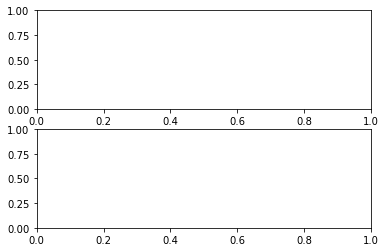

In [ ]:
fig,(ax1,ax2) = plt.subplots(2, 1)


chel_home = epl_1617[epl_1617['HomeTeam']=='Chelsea'][['HomeGoals']].apply(pd.value_counts,normalize=True)
chel_home_pois = [poisson.pmf(i,np.sum(np.multiply(chel_home.values.T,chel_home.index.T),axis=1)[0]) for i in range(8)]
sun_home = epl_1617[epl_1617['HomeTeam']=='Sunderland'][['HomeGoals']].apply(pd.value_counts,normalize=True)
sun_home_pois = [poisson.pmf(i,np.sum(np.multiply(sun_home.values.T,sun_home.index.T),axis=1)[0]) for i in range(8)]

chel_away = epl_1617[epl_1617['AwayTeam']=='Chelsea'][['AwayGoals']].apply(pd.value_counts,normalize=True)
chel_away_pois = [poisson.pmf(i,np.sum(np.multiply(chel_away.values.T,chel_away.index.T),axis=1)[0]) for i in range(8)]
sun_away = epl_1617[epl_1617['AwayTeam']=='Sunderland'][['AwayGoals']].apply(pd.value_counts,normalize=True)
sun_away_pois = [poisson.pmf(i,np.sum(np.multiply(sun_away.values.T,sun_away.index.T),axis=1)[0]) for i in range(8)]

ax1.bar(chel_home.index-0.4,chel_home.values,width=0.4,color="#034694",label="Chelsea")
ax1.bar(sun_home.index,sun_home.values,width=0.4,color="#EB172B",label="Sunderland")
pois1, = ax1.plot([i for i in range(8)], chel_home_pois,
                  linestyle='-', marker='o',label="Chelsea", color = "#0a7bff")
pois1, = ax1.plot([i for i in range(8)], sun_home_pois,
                  linestyle='-', marker='o',label="Sunderland", color = "#ff7c89")
leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
leg.set_title("Poisson                 Actual                ", prop = {'size':'14', 'weight':'bold'})
ax1.set_xlim([-0.5,7.5])
ax1.set_ylim([-0.01,0.65])
ax1.set_xticklabels([])
# mimicing the facet plots in ggplot2 with a bit of a hack
ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})
ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})

ax2.bar(chel_away.index-0.4,chel_away.values,width=0.4,color="#034694",label="Chelsea")
ax2.bar(sun_away.index,sun_away.values,width=0.4,color="#EB172B",label="Sunderland")
pois1, = ax2.plot([i for i in range(8)], chel_away_pois,
                  linestyle='-', marker='o',label="Chelsea", color = "#0a7bff")
pois1, = ax2.plot([i for i in range(8)], sun_away_pois,
                  linestyle='-', marker='o',label="Sunderland", color = "#ff7c89")
ax2.set_xlim([-0.5,7.5])
ax2.set_ylim([-0.01,0.65])
ax1.set_title("Number of Goals per Match (EPL 2016/17 Season)",size=14,fontweight='bold')
ax2.set_xlabel("Goals per Match",size=13)
ax2.text(-1.15, 0.9, 'Proportion of Matches', rotation=90, size=13)
plt.tight_layout()
plt.show()

In [ ]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                21728
Model:                            GLM   Df Residuals:                    21628
Model Family:                 Poisson   Df Model:                           99
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31436.
Date:                Mon, 29 Nov 2021   Deviance:                       25238.
Time:                        05:50:49   Pearson chi2:                 2.21e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1172
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1395      0.039      3.557      0.000       0.063       0.216
team[T.Aston Villa]             -0.3727      0.037    -10.023      0.000      -0.446      -0.300
team[T.Barnsley]                -0.5730      0.166     -3.449      0.001      -0.899      -0.247
team[T.Birmingham]              -0.5250      0.065     -8.100      0.000      -0.652      -0.398
team[T.Blackburn]               -0.2850      0.041     -6.927      0.000      -0.366      -0.204
team[T.Blackpool]               -0.1804      0.137     -1.318      0.187      -0.449       0.088
team[T.Bolton]                  -0.3967      0.048     -8.326      0.000      -0.490      -0.303
team[T.Bournemouth]             -0.3370      0.069     -4.914      0.000      -0.471      -0.203
team[T.Bradford]                -0.6567      0.124     -5.316      0.000      -0.899      -0.415
team[T.Brentford]               -0.2334      0.355     -0.658      0.511      -0.929       0.462
team[T.Brighton]                -0.5943      0.084     -7.117      0.000      -0.758      -0.431
team[T.Burnley]                 -0.5743      0.065     -8.827      0.000      -0.702      -0.447
team[T.Cardiff]                 -0.7201      0.125     -5.747      0.000      -0.966      -0.475
team[T.Charlton]                -0.4239      0.059     -7.211      0.000      -0.539      -0.309
team[T.Chelsea]                 -0.0345      0.033     -1.058      0.290      -0.098       0.029
team[T.Coventry]                -0.4887      0.059     -8.222      0.000      -0.605      -0.372
team[T.Crystal Palace]          -0.5094      0.052     -9.749      0.000      -0.612      -0.407
team[T.Derby]                   -0.5294      0.065     -8.139      0.000      -0.657      -0.402
team[T.Everton]                 -0.3022      0.035     -8.601      0.000      -0.371      -0.233
team[T.Fulham]                  -0.4558      0.046     -9.913      0.000      -0.546      -0.366
team[T.Huddersfield]            -1.0036      0.143     -6.996      0.000      -1.285      -0.722
team[T.Hull]                    -0.6094      0.078     -7.827      0.000      -0.762      -0.457
team[T.Ipswich]                 -0.5033      0.080     -6.261      0.000      -0.661      -0.346
team[T.Leeds]                   -0.2307      0.045     -5.073      0.000      -0.320      -0.142
team[T.Leicester]               -0.2882      0.043     -6.727      0.000      -0.372      -0.204
team[T.Liverpool]               -0.0219      0.032     -0.673      0.501      -0.086       0.042
team[T.Man City]                -0.0406      0.034     -1.180      0.238      -0.108       0.027
team[T.Man United]               0.0731      0.032      2.305      0.021       0.011       0.135
team[T.Middlesbrough]           -0.4413      0.047     -9.382      0.000    

In [ ]:
poisson_model.predict(pd.DataFrame(data={'team': 'Chelsea', 'opponent': 'Sunderland','home':1},index=[1]))

1    2.162288
dtype: float64

In [ ]:
poisson_model.predict(pd.DataFrame(data={'team': 'Sunderland', 'opponent': 'Chelsea','home':0},index=[1]))

1    0.639434
dtype: float64

In [ ]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'Chelsea', 'Sunderland', max_goals=3)
chel_sun = simulate_match(poisson_model, "Chelsea", "Man United",)
# chelsea win
np.sum(np.tril(chel_sun, -1))
# draw
np.sum(np.diag(chel_sun))

0.26476741436725787

In [58]:
chel_sun = simulate_match(poisson_model, "Sunderland", "Chelsea", max_goals=10)
# Home win
home = np.sum(np.tril(chel_sun, -1))
percentage = "{:.0%}".format(home)
print(percentage)

20%


In [59]:
# draw
draw = np.sum(np.diag(chel_sun))
percentage = "{:.0%}".format(draw)
print(percentage)

25%


In [60]:
# Away win
away = np.sum(np.triu(chel_sun, 1))
percentage = "{:.0%}".format(away)
print(percentage)

55%
